# Question

Given the system of equations:

$$− 3x_2 + 7x_3 = 2$$

$$x_1 + 2x_2 − x_3 = 3$$

$$5x_1 − 2x_2 = 2$$

* Compute the determinant.
* Use Cramer’s rule to solve for the x’s.
* Use Gauss elimination with partial pivoting to solve for the x’s.
* Substitute your results back into the original equations to check your solution.

# Question

Given the equation

$$f(x,y) = 2xy + 2x - x^2 - 2y^2 $$

* Find all critical points analytically.
* Define if they are local or global optima and, for each point, decide whether it’s a maximum or a minimum.
* Perform several iterations of the Newton method using $x_0 = -1$, $y_0=1$ to approximate a critical point. Use $\epsilon_s = 10^{−17}$.

# Question

Estimate $ln (2)$ using both linear and quadratic interpolation. Use the points:

* $ln(1) = 0$
* $ln(4) = 1.386294$
* $ln(6) = 1.791759$

Compare your estimate with the exact solution and determine the percent relative error.

# Question

The midpoint method is one of the Runge-Kutta methods for solving differential equations. It consists of performing the following steps from $x_0$ to $x_f$, with a `h` step.

1. Calculate the slope of y at $x_i$
2. Calculate an estimate for the value of y at the intermediate point $x + h/2$ using the slope of y (dy/dx) at $x_{i + 1/2}$
3. Use that estimate of the slope to calculate the value of $x_{i+1}$

![The midpoint method](../images/midpoint_method.png)

It can be extended to a setting in which we have two differential equations by calculating both slopes and an intermediate point ($x_{i+1/2}$, $y_{i+1/2}$).

* Write a Python program that implements the midpoint method for two differential equations. Assume we already have two functions, `dx` and `dy`, that can calculate the derivative of x and of y at a point (x, y). Their signature will be therefore `dx(x,y)` and `dy(x,y)`.



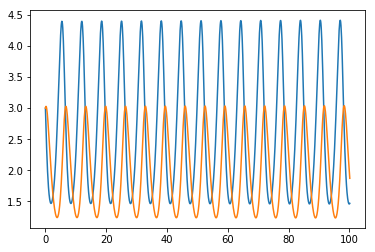

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def dx(x, y, a = 1.2, b = .6): return a*x - b*x*y
def dy(x, y, c = 0.8, d = .3): return -c*y + d*x*y


def midpoint(dx, dy, x_0=3, y_0=3, t_0=0, tf=100, h=1e-3):
    ts = [t_0]
    xs = [x_0]
    ys = [y_0]

    while ts[-1] < tf:
        this_x = xs[-1]
        this_y = ys[-1]

        slope_x0 = dx(this_x, this_y)
        slope_y0 = dy(this_x, this_y)

        midpoint_x = this_x + slope_x0 * (h/2)
        midpoint_y = this_y + slope_y0 * (h/2)

        midpoint_slope_x = dx(midpoint_x, midpoint_y)
        midpoint_slope_y = dy(midpoint_x, midpoint_y)

        endpoint_x = this_x + midpoint_slope_x * h
        endpoint_y = this_y + midpoint_slope_y * h


        xs.append(endpoint_x)
        ys.append(endpoint_y)
        ts.append(ts[-1] + h)

    return xs, ys, ts

xs, ys, ts = midpoint(dx, dy, h=1e-1)

plt.plot(ts, xs)

plt.plot(ts, ys);